In [1]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="ticks")
import matplotlib.pyplot as plt
#import community
from networkx.algorithms.community import greedy_modularity_communities
#import community.community_louvain as cl
import pandas as pd
import scipy.stats as stats
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df_pubmed_sim = pd.read_csv('pubmed_cosine_weights10.csv')

In [3]:
df_nodes=pd.read_csv('pubmed_labels.csv')

In [4]:
df_pubmed = df_pubmed_sim[['source','target','weight']]
df_pubmed['weight']= 1 - df_pubmed['weight']
#df_pubmed_sim['weight']= 1 / df_pubmed_sim['weight']
df_pubmed_sim.head()

,source,target,weight
0,0,1378,0.888623
1,0,1544,0.886371
2,0,6092,0.908040
3,0,7636,0.777387
4,0,14442,0.908920


In [5]:
#scaler = MinMaxScaler(feature_range=(0, 1)) #
#df_pubmed['weight'] = scaler.fit_transform(df_pubmed[['weight']])#
#df_pubmed.head()

In [6]:
df_pubmed.describe()

,source,target,weight
count,44324.000000,44324.000000,44324.000000
mean,6488.399783,13014.458420,0.106910
std,4633.210823,4643.211231,0.113552
min,0.000000,95.000000,0.000487
25%,2523.000000,9773.750000,0.029982
50%,5639.000000,13803.000000,0.071103
75%,9808.000000,16994.250000,0.143845
max,19474.000000,19716.000000,0.965763


In [7]:
pubmed_graph= nx.from_pandas_edgelist(df_pubmed, 'source', 'target', create_using=nx.DiGraph())

In [8]:
pubmed_graph.number_of_edges()

44324

In [9]:
GNN_dist= nx.from_pandas_edgelist(df_pubmed, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

In [10]:
GNN_sim= nx.from_pandas_edgelist(df_pubmed_sim, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

# Degree Centrality

## GNN_pubmed

In [11]:
# Calculate the weighted degree centrality
def weighted_out_degree(G):
  # Calcolo della weighted out-degree centrality
  out_degrees = dict(G.out_degree(weight='weight'))
  max_weight = max(out_degrees.values())
  weighted_out_degrees = {node: (degree / max_weight) for node, degree in out_degrees.items()}

  # Calcolo della somma delle weighted out-degree centralities
  total_weighted_out_degree = sum(weighted_out_degrees.values())

  # Normalizzazione della weighted out-degree centrality
  weighted_out_degree_centrality_normalized = {node: (degree / total_weighted_out_degree) for node, degree in weighted_out_degrees.items()}
  return dict(sorted(weighted_out_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))
# Print the result

def weighted_in_degree(G):
  in_degrees = dict(G.in_degree(weight='weight'))
  max_weight = max(in_degrees.values())
  weighted_in_degrees = {node: (degree / max_weight) for node, degree in in_degrees.items()}

  # Calcolo della somma delle weighted in-degree centralities
  total_weighted_in_degree = sum(weighted_in_degrees.values())

  # Normalizzazione della weighted in-degree centrality
  weighted_in_degree_centrality_normalized = {node: (degree / total_weighted_in_degree) for node, degree in weighted_in_degrees.items()}

  return dict(sorted(weighted_in_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))

In [12]:
GNN_dist_out_degree = weighted_out_degree(GNN_dist)
GNN_dist_in_degree = weighted_in_degree(GNN_dist)

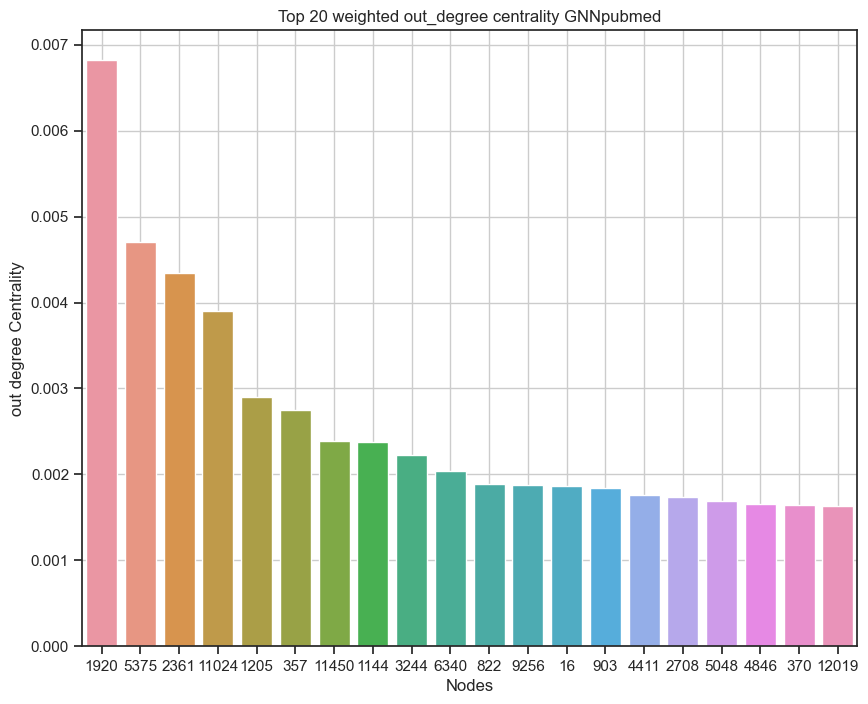

In [13]:
keys = list(map(str,list(GNN_dist_out_degree.keys())[:20]))
values = list(GNN_dist_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('out degree Centrality')
plt.title('Top 20 weighted out_degree centrality GNNpubmed')
plt.grid()
plt.show()

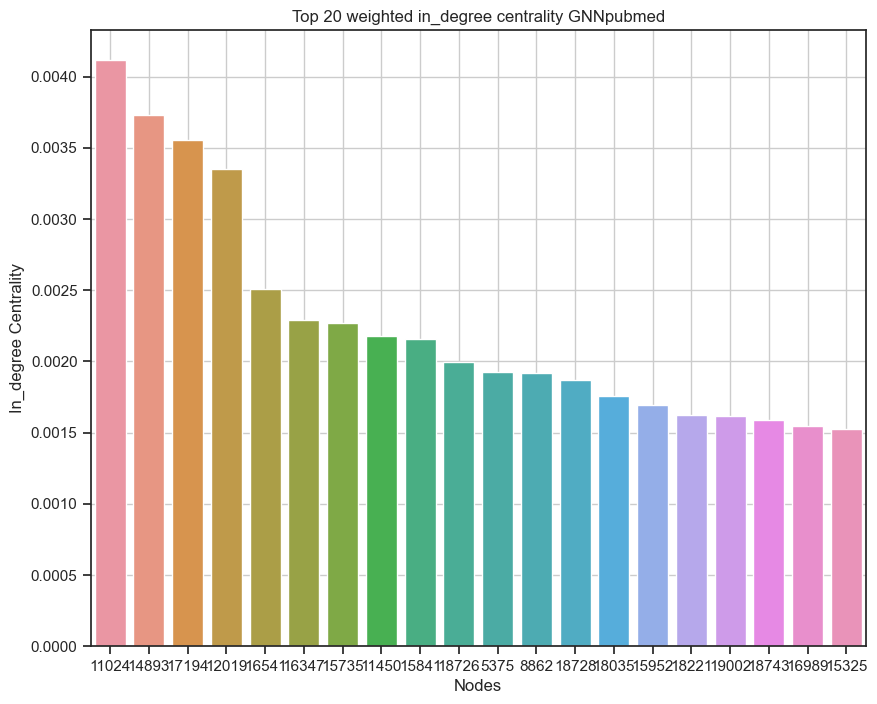

In [14]:
keys = list(map(str,list(GNN_dist_in_degree.keys())[:20]))
values = list(GNN_dist_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('In_degree Centrality')
plt.title('Top 20 weighted in_degree centrality GNNpubmed')
plt.grid()
plt.show()

## pubmed graph

In [15]:
pubmed_out_degree = weighted_out_degree(pubmed_graph)
pubmed_in_degree = weighted_in_degree(pubmed_graph)

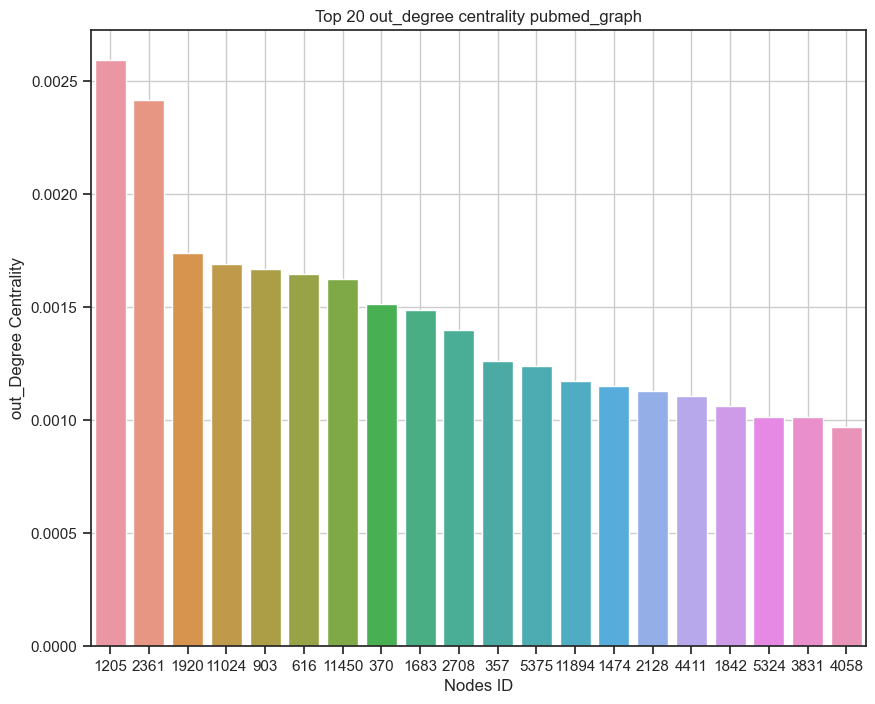

In [16]:

keys = list(map(str,list(pubmed_out_degree.keys())[:20]))
values = list(pubmed_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('out_Degree Centrality')
plt.title('Top 20 out_degree centrality pubmed_graph')
plt.grid()
plt.show()

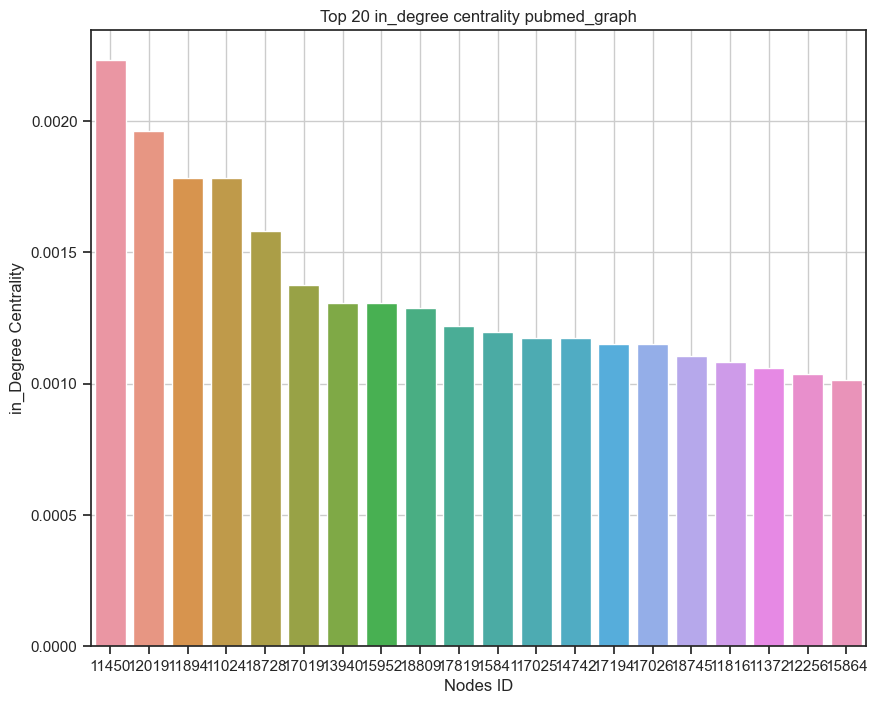

In [17]:
keys = list(map(str,list(pubmed_in_degree.keys())[:20]))
values = list(pubmed_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('in_Degree Centrality')
plt.title('Top 20 in_degree centrality pubmed_graph')
plt.grid()
plt.show()

# Betweeness centrality

## GNN_pubmed

In [18]:
#questa centralità interpreta i pesi come distanza
GNN_betweeness = nx.betweenness_centrality(GNN_dist, weight = 'weight')

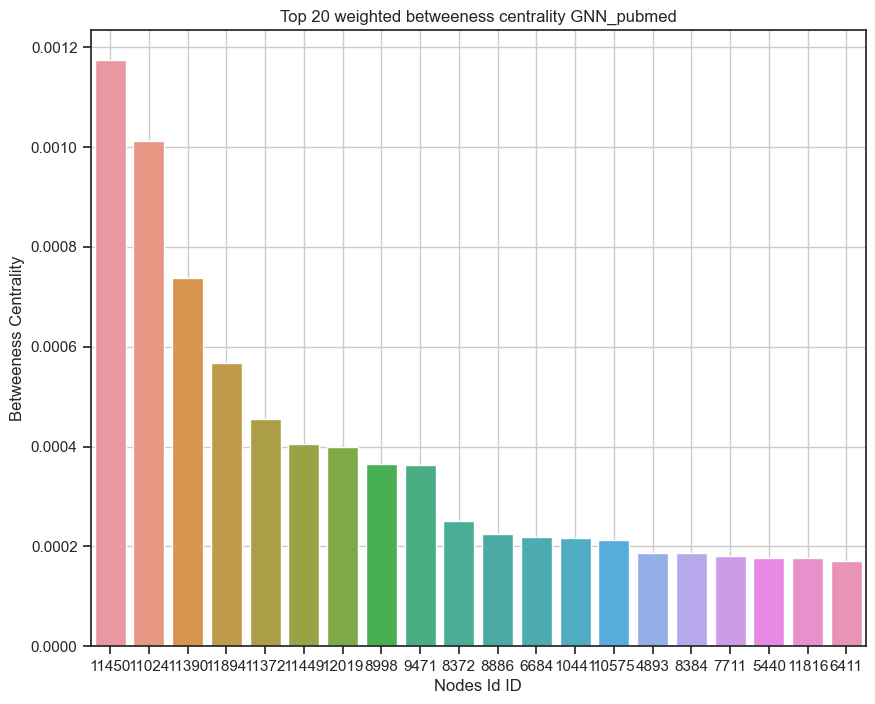

In [19]:
GNN_betweeness = dict(sorted(GNN_betweeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_betweeness.keys())[:20]))
values = list(GNN_betweeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes Id ID')
plt.ylabel('Betweeness Centrality')
plt.title('Top 20 weighted betweeness centrality GNN_pubmed')
plt.grid()
plt.show()

## pubmed graph

In [20]:
bet_pubmed_graph = nx.betweenness_centrality(pubmed_graph)

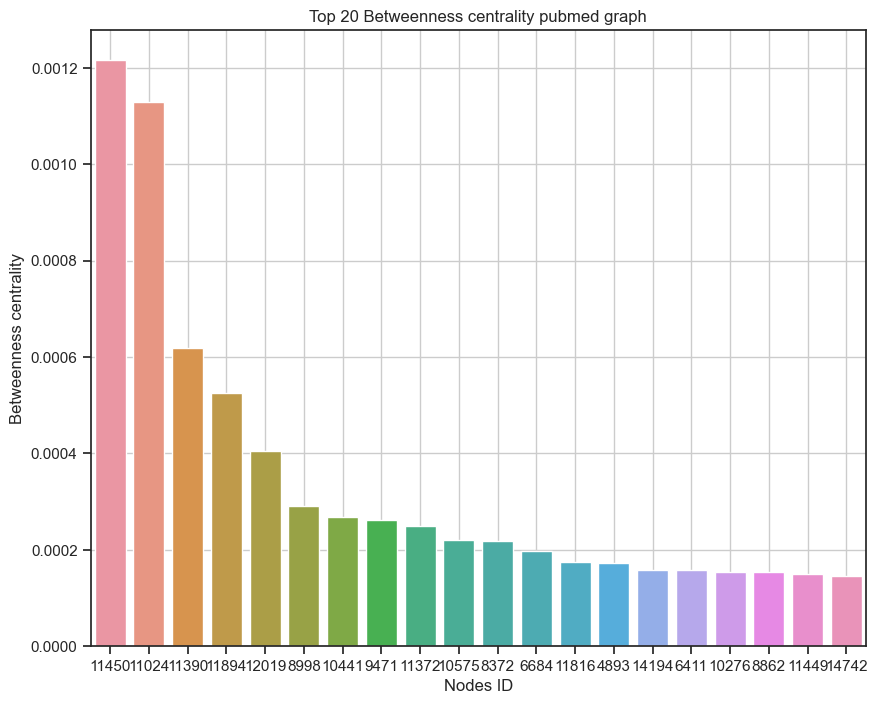

In [21]:
bet_pubmed_graph = dict(sorted(bet_pubmed_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(bet_pubmed_graph.keys())[:20]))
values = list(bet_pubmed_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Betweenness centrality')
plt.title('Top 20 Betweenness centrality pubmed graph')
plt.grid()
plt.show()

# Closeness Centrality

## GNN_pubmed

In [22]:
#questa centralità interpreta i pesi come distanza
GNN_closeness = nx.closeness_centrality(GNN_dist, distance = 'weight')

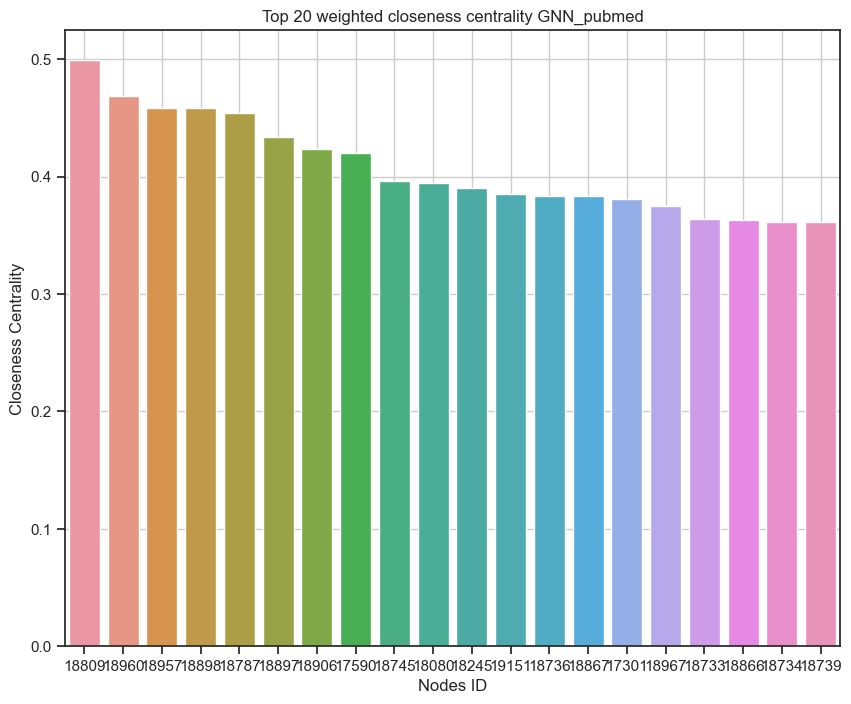

In [23]:
GNN_closeness = dict(sorted(GNN_closeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_closeness.keys())[:20]))
values = list(GNN_closeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness Centrality')
plt.title('Top 20 weighted closeness centrality GNN_pubmed')
plt.grid()
plt.show()

## pubmed

In [24]:
closeness_pubmed_graph = nx.closeness_centrality(pubmed_graph)

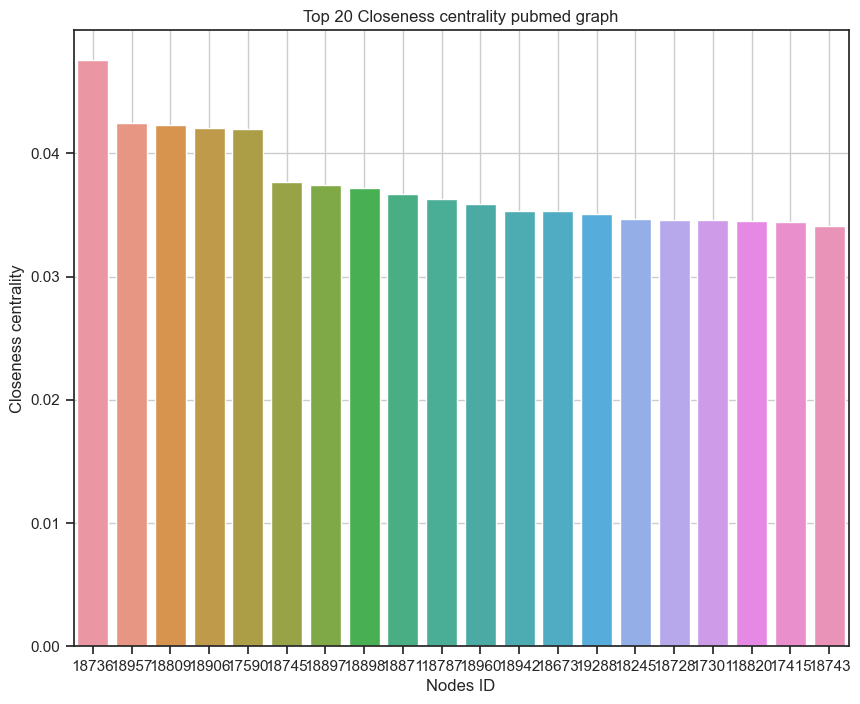

In [25]:
closeness_pubmed_graph = dict(sorted(closeness_pubmed_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(closeness_pubmed_graph.keys())[:20]))
values = list(closeness_pubmed_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness centrality')
plt.title('Top 20 Closeness centrality pubmed graph')
plt.grid()
plt.show()

# Eigenvectror Centrality

## GNN_pubmed

In [26]:
GNN_eigenvector = nx.eigenvector_centrality(GNN_sim, weight = 'weight', max_iter = 1000)

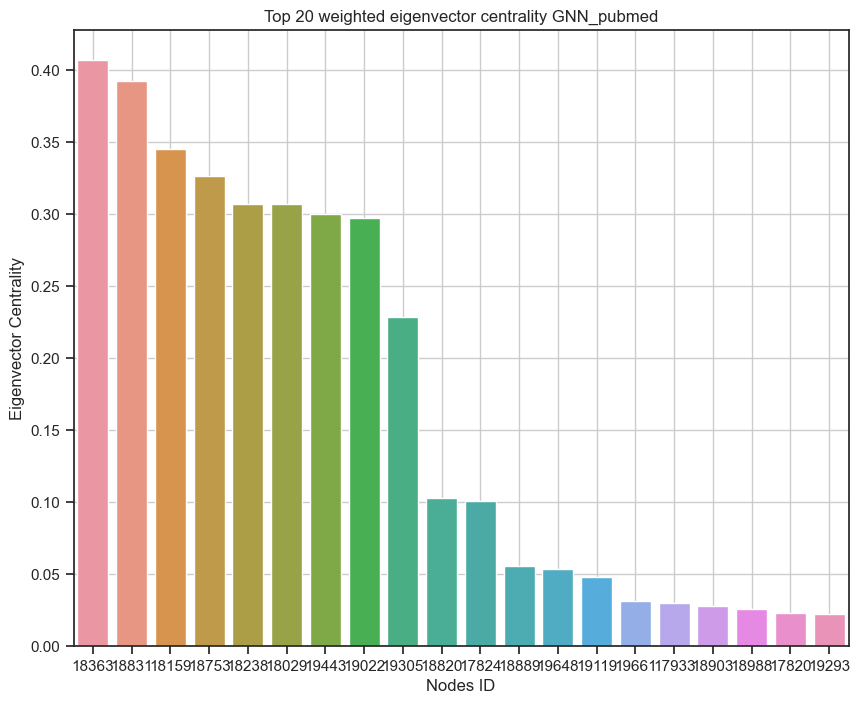

In [27]:
GNN_eigenvector = dict(sorted(GNN_eigenvector.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_eigenvector.keys())[:20]))
values = list(GNN_eigenvector.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Eigenvector Centrality')
plt.title('Top 20 weighted eigenvector centrality GNN_pubmed')
plt.grid()
plt.show()

## pubmed graph

In [28]:
eigen_pubmed_graph = nx.eigenvector_centrality(pubmed_graph, max_iter = 1000)

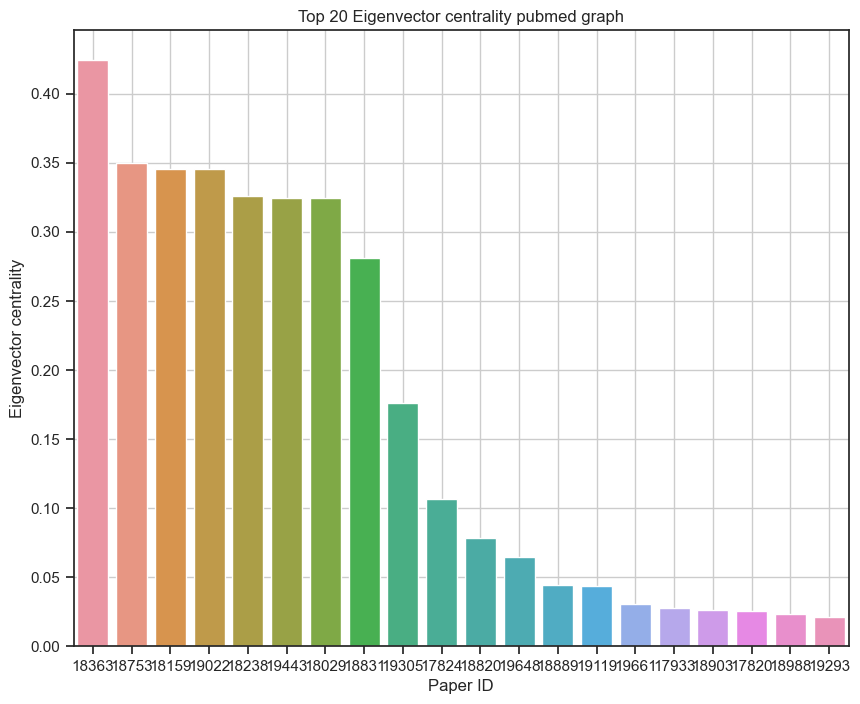

In [29]:
eigen_pubmed_graph = dict(sorted(eigen_pubmed_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(eigen_pubmed_graph.keys())[:20]))
values = list(eigen_pubmed_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Paper ID')
plt.ylabel('Eigenvector centrality')
plt.title('Top 20 Eigenvector centrality pubmed graph')
plt.grid()
plt.show()

# Efficiency

In [30]:
# Calculate the weighted global efficiency
def weighted_global_efficiency(G):
  weighted_efficiency = 0
  for node in G.nodes():
      shortest_paths = nx.shortest_path_length(G, source=node, weight='weight')
      efficiency = sum([1.0 / d for d in shortest_paths.values() if d > 0])
      weighted_efficiency += efficiency

  weighted_efficiency /= (len(G) * (len(G) - 1))
  return round(weighted_efficiency, 3)

In [31]:
#efficiency sulla rete vista dalla GNN
weighted_global_efficiency(GNN_dist)

0.044

In [32]:
weighted_global_efficiency(pubmed_graph)

0.002

## Modularity

In [33]:

def weighted_modularty(G):
  # Compute the partition of the graph using the Louvain method
  partition = greedy_modularity_communities(G, weight='weight')

  # Compute the modularity of the partition using the Louvain method
  modularity = nx.algorithms.community.quality.modularity(G, partition, weight='weight')
  return round(modularity, 3)

In [34]:
print(weighted_modularty(GNN_sim))

0.725


In [35]:
print(weighted_modularty(pubmed_graph))

0.724


# Community

In [36]:
#define Jaccard Similarity function
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

comm_GNN = greedy_modularity_communities(GNN_sim, weight='weight')
comm_pubmed = greedy_modularity_communities(pubmed_graph)

In [37]:
print(len(comm_GNN))
print(len(comm_pubmed))

106
121


In [38]:
for com in comm_GNN:
    print(len(com))

3937
3324
2992
2785
1090
945
579
438
391
364
362
358
240
143
120
115
105
101
99
80
73
66
65
62
51
48
46
41
38
34
28
26
23
19
18
17
17
16
16
13
13
13
12
12
12
11
10
10
10
10
10
10
9
9
9
8
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
2


In [39]:
for com in comm_pubmed:
    print(len(com))

4106
3628
2670
2653
1130
468
447
396
356
325
291
229
201
198
194
168
165
156
148
134
124
110
87
86
83
80
67
52
48
42
41
40
39
34
27
23
22
21
18
17
16
15
15
14
14
13
13
13
13
13
12
12
12
12
11
11
11
11
10
10
10
9
9
9
9
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3


In [40]:
labels = df_nodes['label'].unique()
mapping = {}
for i in range(len(df_nodes)):
  mapping[i] = df_nodes.loc[i]['label']

In [41]:
def gini_index(cluster, labels):
    """
    Calculates the Gini Index for a given cluster of objects and 7 labels.

    Parameters:
        cluster (list): A list of objects in the cluster.
        labels (list): A list of 7 labels.

    Returns:
        float: The Gini Index for the given cluster and labels.
    """
    total_count = len(cluster)
    if total_count == 0:
        return 0.0

    gini_sum = 0.0
    for label in labels:
        label_count = sum([1 for obj in cluster if mapping[obj] == label])
        label_freq = label_count / total_count
        gini_sum += label_freq ** 2

    gini_index = 1.0 - gini_sum  
    return round(gini_index, 3)

In [42]:
import scipy

gini_GNN = [gini_index(i,labels) for i in comm_GNN]
gini_pubmed = [gini_index(i,labels) for i in comm_pubmed]
#scipy.stats.wilcoxon(gini_GNN, gini_pubmed)

In [43]:
print('mannwhitneyu',scipy.stats.mannwhitneyu(gini_GNN, gini_pubmed))

mannwhitneyu MannwhitneyuResult(statistic=6196.5, pvalue=0.6582114963280563)


In [44]:
df_nodes['label'].unique()

array([1, 0, 2], dtype=int64)

<AxesSubplot:>

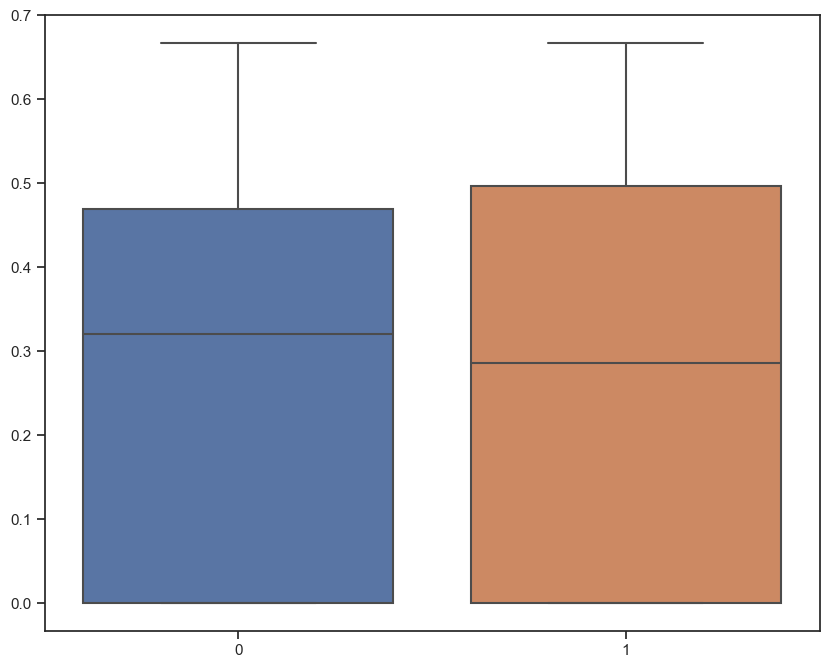

In [45]:
import numpy as np
import seaborn as sns

all_arr = [gini_GNN, gini_pubmed]

sns.boxplot(data=all_arr, )

In [46]:
gini=0
clusters = comm_GNN[:5]
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.38

In [47]:
gini=0
clusters = comm_pubmed[:5]
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.362

In [48]:
#out degree
x1 = list(GNN_dist_out_degree.keys())[:100]
x2 = list(pubmed_out_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.178989898989899
p_value 0.008324632633094655
Jaccard Index: 0.30718954248366015
[1920, 5375, 2361, 11024, 1205, 357, 11450, 1144, 3244, 6340, 822, 9256, 16, 903, 4411, 2708, 5048, 4846, 370, 12019, 6813, 1416, 1683, 10441, 7716, 8862, 3683, 8093, 3663, 8626, 8621, 616, 5324, 1660, 2008, 2987, 6794, 3577, 2623, 6684, 2112, 3190, 4058, 10375, 1402, 2134, 1842, 5661, 9978, 1612, 3831, 668, 6501, 4043, 3531, 1817, 909, 4733, 3517, 1761, 7666, 4450, 3082, 1439, 6851, 210, 1378, 2673, 3327, 10055, 2759, 5515, 1602, 4273, 1544, 7979, 5943, 7, 4262, 3153, 6686, 3136, 518, 1614, 7456, 953, 12955, 1973, 14893, 754, 1043, 3773, 2862, 2538, 1841, 4743, 6352, 9965, 6273, 3405]
[1205, 2361, 1920, 11024, 903, 616, 11450, 370, 1683, 2708, 357, 5375, 11894, 1474, 2128, 4411, 1842, 5324, 3831, 4058, 12019, 5467, 2425, 5440, 3190, 4546, 1602, 2098, 4932, 3082, 9471, 735, 8384, 1565, 6794, 2120, 668, 4262, 1425, 3531, 8093, 4893, 6411, 1045, 3683, 284, 7716, 2134, 9808, 5661, 7130, 2195, 3441, 5048

In [49]:
#in degree
x1 = list(GNN_dist_in_degree.keys())[:100]
x2 = list(pubmed_in_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.01777777777777778
p_value 0.7932641775975884
Jaccard Index: 0.25
[11024, 14893, 17194, 12019, 16541, 16347, 15735, 11450, 15841, 18726, 5375, 8862, 18728, 18035, 15952, 18221, 19002, 18743, 16989, 15325, 18770, 18765, 18178, 17499, 10441, 18809, 11456, 6813, 12955, 18276, 18625, 14353, 9181, 9256, 11907, 13118, 17689, 16214, 18736, 8626, 16637, 18841, 16901, 18224, 18768, 12256, 14915, 13677, 14742, 18745, 17415, 15577, 14044, 16051, 10535, 18440, 18811, 10276, 16918, 13623, 7979, 13787, 17819, 18558, 17025, 18782, 17301, 15324, 8093, 17178, 14791, 10818, 18753, 8621, 15479, 8576, 14640, 10744, 16342, 16697, 16560, 9366, 10055, 14420, 15189, 13983, 15506, 18632, 17911, 12066, 17399, 18680, 14110, 16295, 17653, 12457, 17155, 13525, 18370, 9965]
[11450, 12019, 11894, 11024, 18728, 17019, 13940, 15952, 18809, 17819, 15841, 17025, 14742, 17194, 17026, 18745, 11816, 11372, 12256, 15864, 17499, 15788, 17415, 18768, 17701, 17899, 14893, 14353, 14603, 16214, 18811, 18743, 10265, 17649, 

In [50]:
#betweennes
x1 = list(GNN_betweeness.keys())[:100]
x2 = list(bet_pubmed_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: -0.12606060606060607
p_value 0.06312005498933582
Jaccard Index: 0.6949152542372882
[11450, 11024, 11390, 11894, 11372, 11449, 12019, 8998, 9471, 8372, 8886, 6684, 10441, 10575, 4893, 8384, 7711, 5440, 11816, 6411, 13364, 8626, 4421, 9921, 11468, 8862, 7780, 9808, 12457, 14742, 10276, 5106, 8296, 9965, 10308, 15864, 8024, 14194, 13940, 4181, 11084, 5661, 8509, 15788, 9358, 12349, 5467, 5324, 5224, 7756, 10433, 10540, 11866, 7154, 8668, 10595, 13256, 8405, 1205, 12972, 11526, 15498, 8426, 9264, 14862, 8089, 11287, 9775, 14654, 8106, 11814, 11989, 4237, 15841, 7852, 10185, 14515, 6920, 3831, 4445, 4149, 10265, 14603, 5104, 9568, 5839, 12592, 5968, 12256, 15325, 9192, 6511, 14651, 11099, 4194, 5048, 4537, 7295, 11536, 10796]
[11450, 11024, 11390, 11894, 12019, 8998, 10441, 9471, 11372, 10575, 8372, 6684, 11816, 4893, 14194, 6411, 10276, 8862, 11449, 14742, 8886, 12457, 9921, 6511, 9965, 8626, 13364, 5440, 8384, 10433, 5106, 8405, 1205, 7780, 7711, 3831, 13256, 12972, 8024, 9808, 5324,

In [51]:
#closeness
x1 = list(GNN_closeness.keys())[:20]
x2 = list(closeness_pubmed_graph.keys())[:20]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )
print(x1)
print(x2)

tau: 0.2736842105263158
p_value 0.0983302187347563
Jaccard Index: 0.42857142857142855
[18809, 18960, 18957, 18898, 18787, 18897, 18906, 17590, 18745, 18080, 18245, 19151, 18736, 18867, 17301, 18967, 18733, 18866, 18734, 18739]
[18736, 18957, 18809, 18906, 17590, 18745, 18897, 18898, 18871, 18787, 18960, 18942, 18673, 19288, 18245, 18728, 17301, 18820, 17415, 18743]


In [52]:
#eigenvector

x1 = list(GNN_eigenvector.keys())[:100]
x2 = list(eigen_pubmed_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)

print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.10383838383838385
p_value 0.12583068961766083
Jaccard Index: 0.9230769230769231
[18363, 18831, 18159, 18753, 18238, 18029, 19443, 19022, 19305, 18820, 17824, 18889, 19648, 19119, 19661, 17933, 18903, 18988, 17820, 19293, 19001, 18639, 18673, 18148, 18614, 18670, 18952, 18881, 18870, 18949, 18249, 18967, 17018, 18347, 17819, 18742, 19681, 18975, 18118, 18970, 18452, 18736, 19223, 17332, 17899, 17222, 18838, 17847, 19336, 18912, 17649, 18722, 17610, 17305, 16843, 18812, 18811, 19569, 17053, 18694, 18843, 18929, 18771, 18586, 16989, 17816, 18728, 18814, 18740, 17255, 16754, 18910, 19067, 17701, 18380, 18294, 17616, 18744, 18779, 16747, 19008, 18706, 18719, 18468, 17901, 16033, 19029, 17856, 19442, 19245, 18474, 17493, 19116, 18785, 18758, 18961, 16896, 18989, 17454, 18738]
[18363, 18753, 18159, 19022, 18238, 19443, 18029, 18831, 19305, 17824, 18820, 19648, 18889, 19119, 19661, 17933, 18903, 17820, 18988, 19293, 19001, 18639, 18148, 18614, 18673, 18952, 18670, 18949, 18870, 18881, 1